<a href="https://www.kaggle.com/code/yorkyong/monthly-mrt-traffic-data-exploration?scriptVersionId=156786141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xlrd
!pip install --upgrade pandas
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.7 MB/s eta 0:00:00
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b1/67/aca1f6e215d957d24d0a290321f368503305480268f9617bf625243e9dea/pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.10.0 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
libpysal 4.9.2 requires packaging>=22

In [2]:
csv1 = r'/kaggle/input/singapore-passenger-volume-by-train-stations/transport_node_train_202308.csv'
csv2 = r'/kaggle/input/singapore-passenger-volume-by-train-stations/transport_node_train_202309.csv'
csv3 = r'/kaggle/input/singapore-passenger-volume-by-train-stations/transport_node_train_202310.csv'

df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)
df3 = pd.read_csv(csv3)

# Split the "PT_CODE" column and keep the alphanumeric part before the first '/'
df1['PT_CODE'] = df1['PT_CODE'].str.split('/').str[0]
df2['PT_CODE'] = df2['PT_CODE'].str.split('/').str[0]
df3['PT_CODE'] = df3['PT_CODE'].str.split('/').str[0]

merged_df = pd.concat([df1, df2,df3], ignore_index=True)

print(merged_df)


      YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE PT_CODE  \
0        2023-08           WEEKDAY             22   TRAIN    NS28   
1        2023-08  WEEKENDS/HOLIDAY             22   TRAIN    NS28   
2        2023-08  WEEKENDS/HOLIDAY              0   TRAIN    DT10   
3        2023-08           WEEKDAY              0   TRAIN    DT10   
4        2023-08           WEEKDAY             10   TRAIN    EW16   
...          ...               ...            ...     ...     ...   
20456    2023-10  WEEKENDS/HOLIDAY              6   TRAIN    DT23   
20457    2023-10  WEEKENDS/HOLIDAY              7   TRAIN    NS27   
20458    2023-10           WEEKDAY              7   TRAIN    NS27   
20459    2023-10           WEEKDAY             12   TRAIN     SE5   
20460    2023-10  WEEKENDS/HOLIDAY             12   TRAIN     SE5   

       TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                      752                   311  
1                      612                   223  
2                 

In [3]:
# Read the MRT Stations Excel file
stations_df = pd.read_excel(r'/kaggle/input/singapore-passenger-volume-by-train-stations/Train Station Codes and Chinese Names.xls')

# Merge the DataFrames based on the "PT_CODE" and "stn_code" columns
result_df = pd.merge(merged_df, stations_df[['stn_code', 'mrt_station_english']], left_on='PT_CODE', right_on='stn_code', how='left')

# Drop the extra "Code" column
result_df = result_df.drop('stn_code', axis=1)

# Display the final DataFrame
print(result_df)

      YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE PT_CODE  \
0        2023-08           WEEKDAY             22   TRAIN    NS28   
1        2023-08  WEEKENDS/HOLIDAY             22   TRAIN    NS28   
2        2023-08  WEEKENDS/HOLIDAY              0   TRAIN    DT10   
3        2023-08           WEEKDAY              0   TRAIN    DT10   
4        2023-08           WEEKDAY             10   TRAIN    EW16   
...          ...               ...            ...     ...     ...   
20456    2023-10  WEEKENDS/HOLIDAY              6   TRAIN    DT23   
20457    2023-10  WEEKENDS/HOLIDAY              7   TRAIN    NS27   
20458    2023-10           WEEKDAY              7   TRAIN    NS27   
20459    2023-10           WEEKDAY             12   TRAIN     SE5   
20460    2023-10  WEEKENDS/HOLIDAY             12   TRAIN     SE5   

       TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME mrt_station_english  
0                      752                   311   Marina South Pier  
1                      612   

In [4]:
# Check for missing values in the result_df DataFrame
missing_values = result_df.isna().sum()

# Display the count of missing values for each column
print("Missing values in result_df:")
print(missing_values)

Missing values in result_df:
YEAR_MONTH              0
DAY_TYPE                0
TIME_PER_HOUR           0
PT_TYPE                 0
PT_CODE                 0
TOTAL_TAP_IN_VOLUME     0
TOTAL_TAP_OUT_VOLUME    0
mrt_station_english     0
dtype: int64


In [5]:
selected_months = ['2023-10', '2023-09', '2023-08']

# Filter the DataFrame for the selected months
filtered_df = result_df[result_df['YEAR_MONTH'].isin(selected_months)]

# Group by 'mrt_station_english', 'YEAR_MONTH', and 'DAY_TYPE', and sum the 'TOTAL_TAP_OUT_VOLUME'
grouped_df = filtered_df.groupby(['mrt_station_english', 'YEAR_MONTH', 'DAY_TYPE'])['TOTAL_TAP_OUT_VOLUME'].sum().reset_index()

# Create two separate tables for 'WEEKDAY' and 'WEEKENDS/HOLIDAY'
weekday_table = pd.pivot_table(grouped_df[grouped_df['DAY_TYPE'] == 'WEEKDAY'],
                               values='TOTAL_TAP_OUT_VOLUME',
                               index='mrt_station_english',
                               columns='YEAR_MONTH',
                               aggfunc='sum',
                               fill_value=0)

weekend_holiday_table = pd.pivot_table(grouped_df[grouped_df['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'],
                                       values='TOTAL_TAP_OUT_VOLUME',
                                       index='mrt_station_english',
                                       columns='YEAR_MONTH',
                                       aggfunc='sum',
                                       fill_value=0)

# Sort the tables by the sum of 'TOTAL_TAP_OUT_VOLUME' for the three months
weekday_table_sum = weekday_table.sum(axis=1)
weekday_table_sorted = weekday_table.loc[weekday_table_sum.sort_values(ascending=False).index]

weekend_holiday_table_sum = weekend_holiday_table.sum(axis=1)
weekend_holiday_table_sorted = weekend_holiday_table.loc[weekend_holiday_table_sum.sort_values(ascending=False).index]

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted tables
print("Table for WEEKDAY:")
print(weekday_table_sorted)

print("\nTable for WEEKENDS/HOLIDAY:")
print(weekend_holiday_table_sorted)

# Reset display options to default values if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Table for WEEKDAY:
YEAR_MONTH           2023-08  2023-09  2023-10
mrt_station_english                           
Jurong East          1586251  1393215  1524855
Woodlands            1432184  1242693  1418406
Raffles Place        1335308  1220444  1275885
Orchard              1331812  1205602  1264219
Serangoon            1306554  1162337  1287123
Yishun               1306740  1152361  1268635
Newton               1276334  1174204  1275577
Boon Lay             1225605  1102251  1208530
Tampines             1219010  1088088  1193156
Bugis                1192289  1077636  1127968
Clementi             1128642   993656  1118089
Ang Mo Kio           1096967   981084  1083191
Chinatown            1092257   978541  1033203
Paya Lebar           1029531   915109  1002691
HarbourFront         1018823   908958   972645
Sengkang             1002415   897940   994061
Bukit Panjang         969397   859538   953233
Tanjong Pagar         936067   855043   922730
City Hall             936910   870990   8

/tmp/ipykernel_19/3615640558.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_OUT_VOLUME', hue='DAY_TYPE',


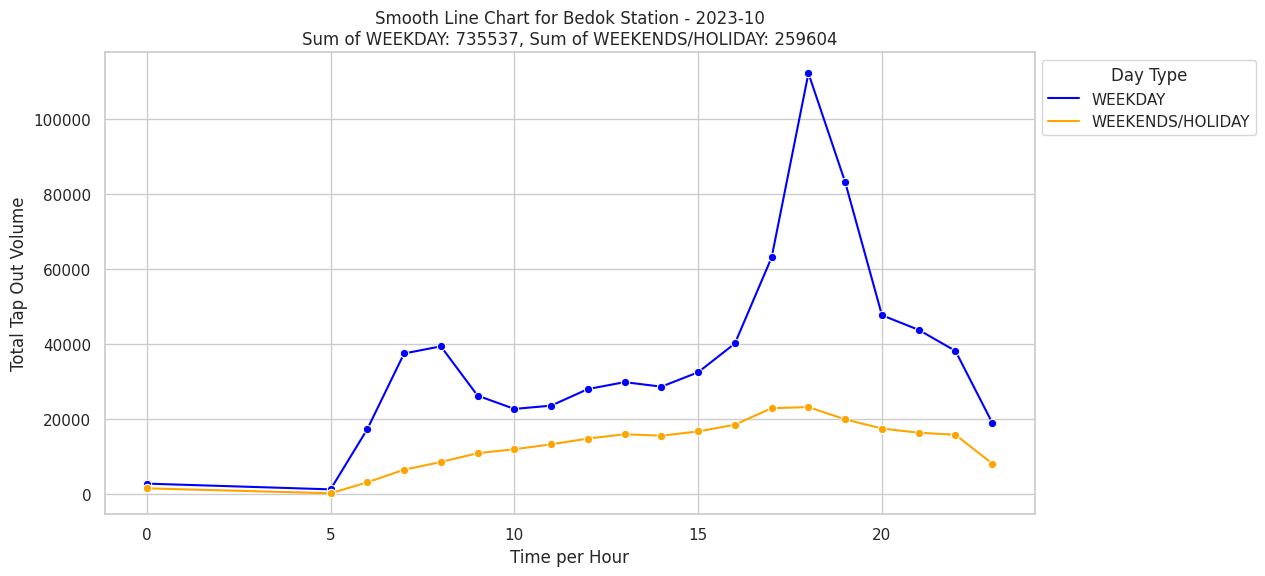

/tmp/ipykernel_19/3615640558.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_OUT_VOLUME', hue='DAY_TYPE',


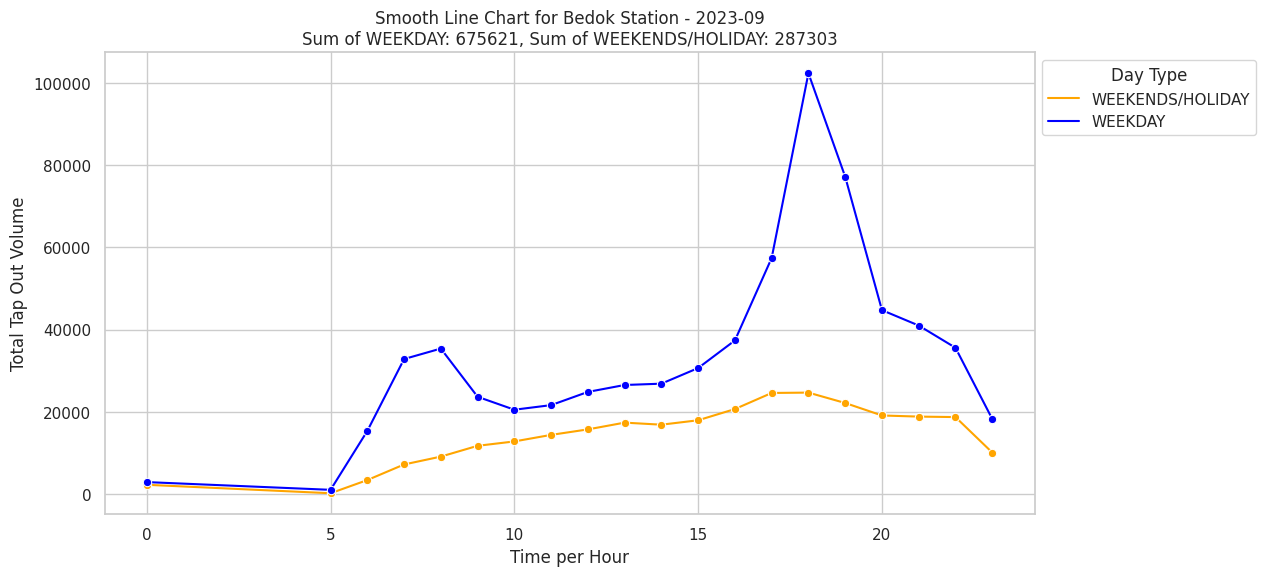

/tmp/ipykernel_19/3615640558.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_OUT_VOLUME', hue='DAY_TYPE',


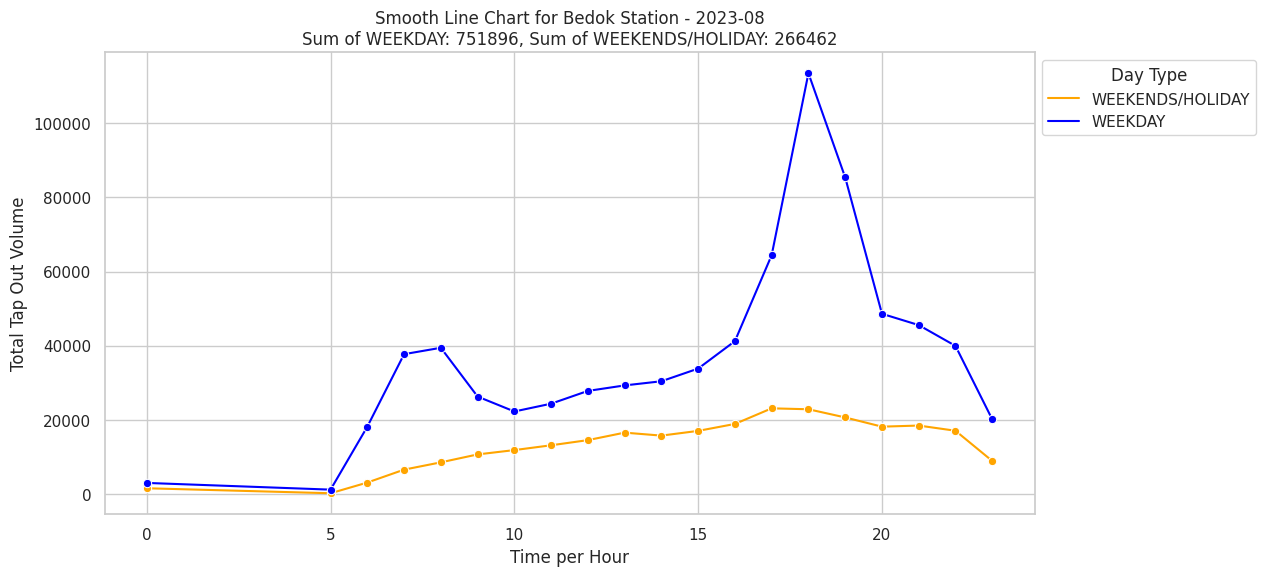

In [6]:
# Specify the months for which you want to create charts
selected_months = ['2023-10', '2023-09', '2023-08']

# Filter the DataFrame for the specified station (e.g., Mounbatten) and selected months
filtered_df = result_df[(result_df['mrt_station_english'] == 'Bedok') & (result_df['YEAR_MONTH'].isin(selected_months))]

# Sort the DataFrame by 'YEAR_MONTH' and 'TIME_PER_HOUR'
filtered_df = filtered_df.sort_values(by=['TIME_PER_HOUR'])

# Define a custom color palette for 'DAY_TYPE'
custom_palette = {'WEEKDAY': 'blue', 'WEEKENDS/HOLIDAY': 'orange'}

# Plot three separate charts for each specified month
for month in selected_months:
    month_data = filtered_df[filtered_df['YEAR_MONTH'] == month]

    # Calculate the sum of 'TOTAL_TAP_OUT_VOLUME' for each 'DAY_TYPE'
    sum_per_day_type = month_data.groupby('DAY_TYPE')['TOTAL_TAP_OUT_VOLUME'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Plot two lines for each month based on 'DAY_TYPE'
    sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_OUT_VOLUME', hue='DAY_TYPE',
                 ci=None, marker='o',palette = custom_palette)

    # Include total volume in the title
    title = f'Smooth Line Chart for Bedok Station - {month}\n'
    for _, row in sum_per_day_type.iterrows():
        title += f'Sum of {row["DAY_TYPE"]}: {row["TOTAL_TAP_OUT_VOLUME"]}, '

    plt.title(title[:-2])  # Remove the trailing comma and space
    plt.xlabel('Time per Hour')
    plt.ylabel('Total Tap Out Volume')
    plt.legend(title='Day Type', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

Intrestingly, we can see that the pattern is reversed when it is plotted with TAP_IN_VOLUME

/tmp/ipykernel_19/1377774048.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_IN_VOLUME', hue='DAY_TYPE',


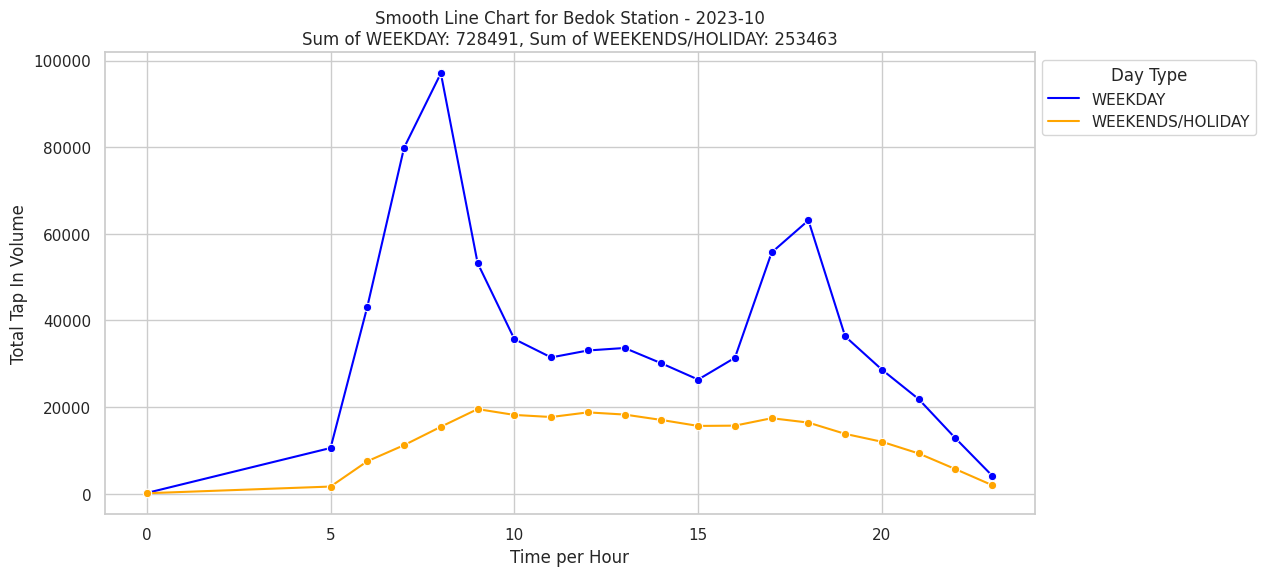

/tmp/ipykernel_19/1377774048.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_IN_VOLUME', hue='DAY_TYPE',


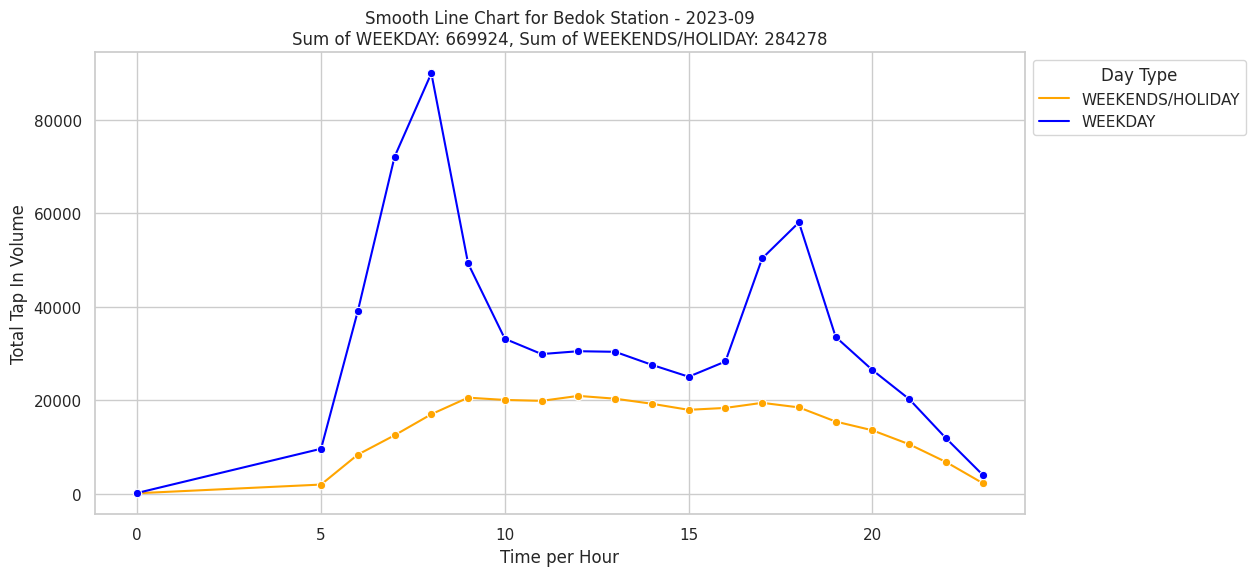

/tmp/ipykernel_19/1377774048.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_IN_VOLUME', hue='DAY_TYPE',


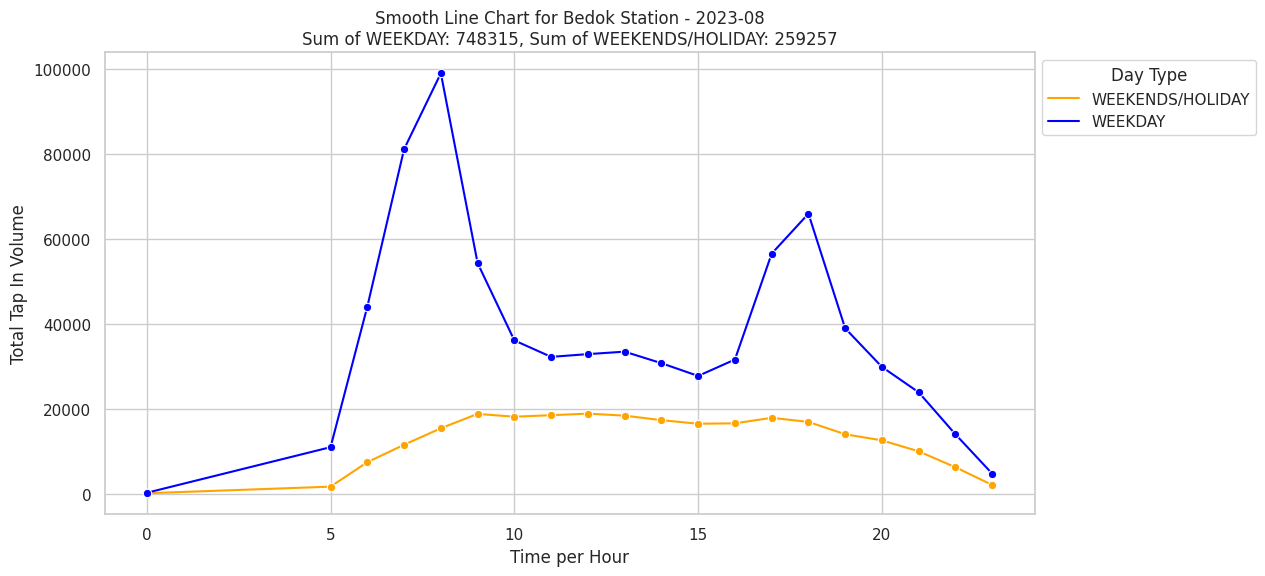

In [7]:
# Specify the months for which you want to create charts
selected_months = ['2023-10', '2023-09', '2023-08']

# Filter the DataFrame for the specified station (e.g., Mounbatten) and selected months
filtered_df = result_df[(result_df['mrt_station_english'] == 'Bedok') & (result_df['YEAR_MONTH'].isin(selected_months))]

# Sort the DataFrame by 'YEAR_MONTH' and 'TIME_PER_HOUR'
filtered_df = filtered_df.sort_values(by=['TIME_PER_HOUR'])

# Define a custom color palette for 'DAY_TYPE'
custom_palette = {'WEEKDAY': 'blue', 'WEEKENDS/HOLIDAY': 'orange'}

# Plot three separate charts for each specified month
for month in selected_months:
    month_data = filtered_df[filtered_df['YEAR_MONTH'] == month]

    # Calculate the sum of 'TOTAL_TAP_OUT_VOLUME' for each 'DAY_TYPE'
    sum_per_day_type = month_data.groupby('DAY_TYPE')['TOTAL_TAP_IN_VOLUME'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Plot two lines for each month based on 'DAY_TYPE'
    sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_IN_VOLUME', hue='DAY_TYPE',
                 ci=None, marker='o',palette = custom_palette)

    # Include total volume in the title
    title = f'Smooth Line Chart for Bedok Station - {month}\n'
    for _, row in sum_per_day_type.iterrows():
        title += f'Sum of {row["DAY_TYPE"]}: {row["TOTAL_TAP_IN_VOLUME"]}, '

    plt.title(title[:-2])  # Remove the trailing comma and space
    plt.xlabel('Time per Hour')
    plt.ylabel('Total Tap In Volume')
    plt.legend(title='Day Type', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

Below we try to plot the charts that shows the net difference between total tap in and total tap out to see if it is useful.

/tmp/ipykernel_19/1210491626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NET_DIFFERENCE'] = filtered_df['TOTAL_TAP_IN_VOLUME'] - filtered_df['TOTAL_TAP_OUT_VOLUME']
/tmp/ipykernel_19/1210491626.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='NET_DIFFERENCE', hue='DAY_TYPE',


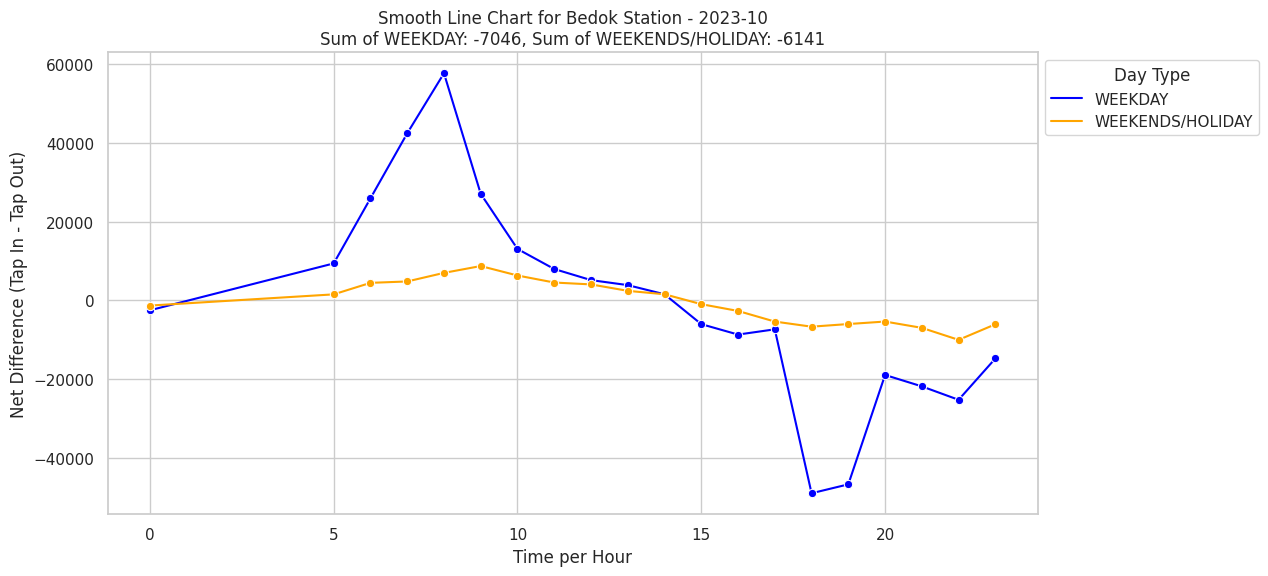

/tmp/ipykernel_19/1210491626.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='NET_DIFFERENCE', hue='DAY_TYPE',


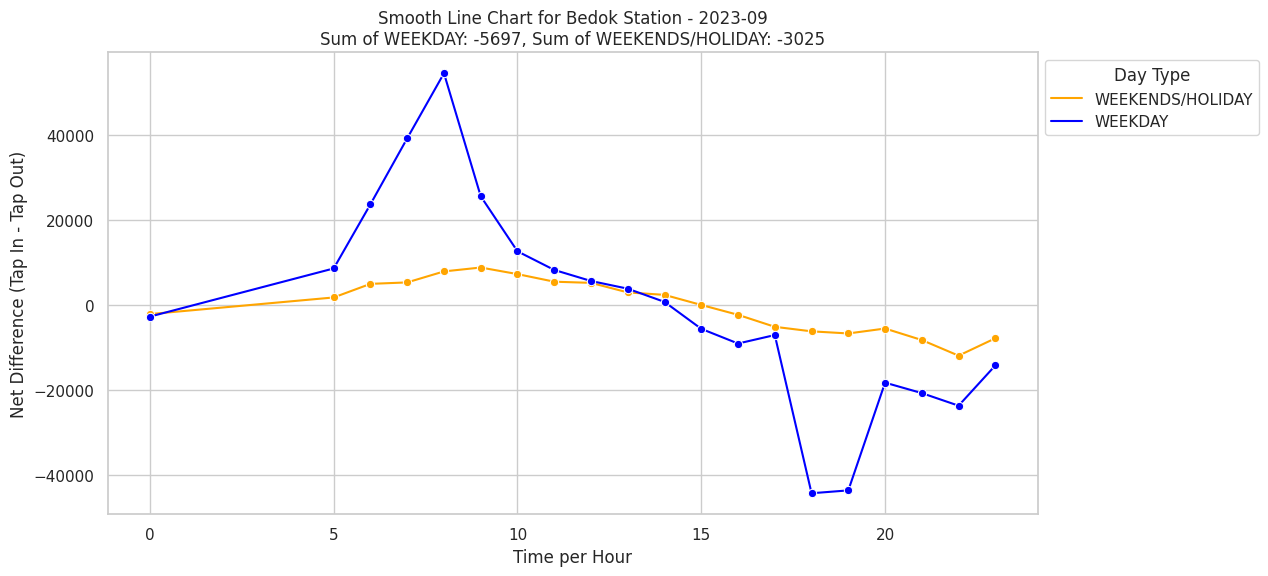

/tmp/ipykernel_19/1210491626.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='NET_DIFFERENCE', hue='DAY_TYPE',


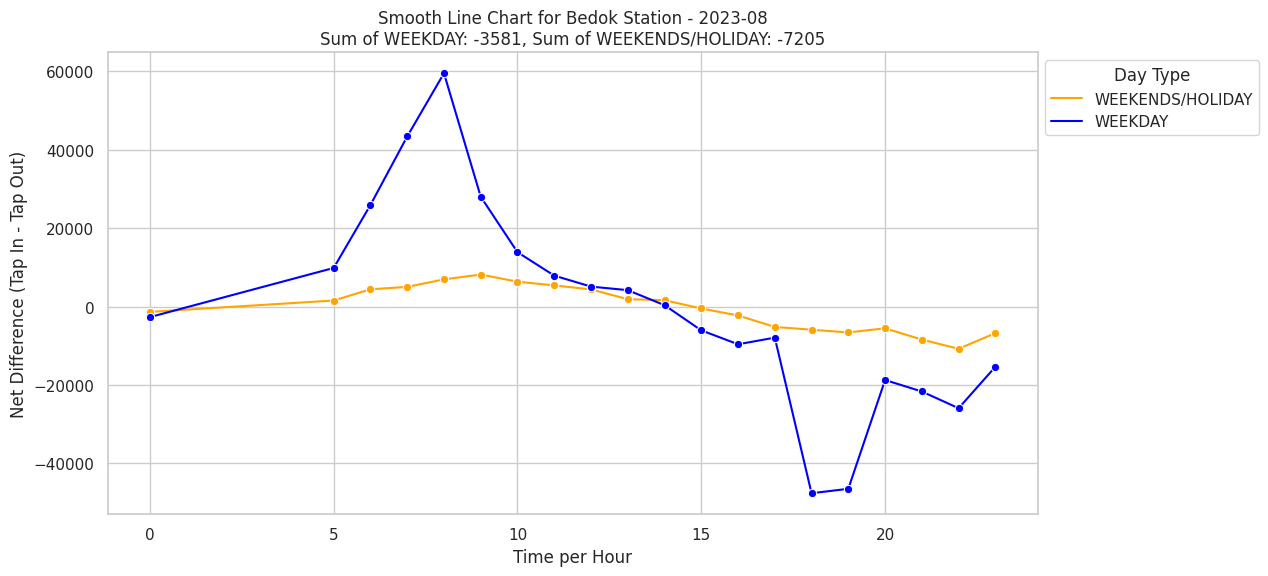

In [8]:
# Specify the months for which you want to create charts
selected_months = ['2023-10', '2023-09', '2023-08']

# Filter the DataFrame for the specified station (e.g., Bedok) and selected months
filtered_df = result_df[(result_df['mrt_station_english'] == 'Bedok') & (result_df['YEAR_MONTH'].isin(selected_months))]

# Calculate the net difference between TOTAL_TAP_IN_VOLUME and TOTAL_TAP_OUT_VOLUME
filtered_df['NET_DIFFERENCE'] = filtered_df['TOTAL_TAP_IN_VOLUME'] - filtered_df['TOTAL_TAP_OUT_VOLUME']

# Sort the DataFrame by 'YEAR_MONTH' and 'TIME_PER_HOUR'
filtered_df = filtered_df.sort_values(by=['TIME_PER_HOUR'])

# Define a custom color palette for 'DAY_TYPE'
custom_palette = {'WEEKDAY': 'blue', 'WEEKENDS/HOLIDAY': 'orange'}

# Plot three separate charts for each specified month
for month in selected_months:
    month_data = filtered_df[filtered_df['YEAR_MONTH'] == month]

    # Calculate the sum of 'NET_DIFFERENCE' for each 'DAY_TYPE'
    sum_per_day_type = month_data.groupby('DAY_TYPE')['NET_DIFFERENCE'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Plot two lines for each month based on 'DAY_TYPE'
    sns.lineplot(data=month_data, x='TIME_PER_HOUR', y='NET_DIFFERENCE', hue='DAY_TYPE',
                 ci=None, marker='o', palette=custom_palette)

    # Include total volume in the title
    title = f'Smooth Line Chart for Bedok Station - {month}\n'
    for _, row in sum_per_day_type.iterrows():
        title += f'Sum of {row["DAY_TYPE"]}: {row["NET_DIFFERENCE"]}, '

    plt.title(title[:-2])  # Remove the trailing comma and space
    plt.xlabel('Time per Hour')
    plt.ylabel('Net Difference (Tap In - Tap Out)')
    plt.legend(title='Day Type', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

Plot it together using a bar chart for both tap out and tap ins and visually it is more easy to see

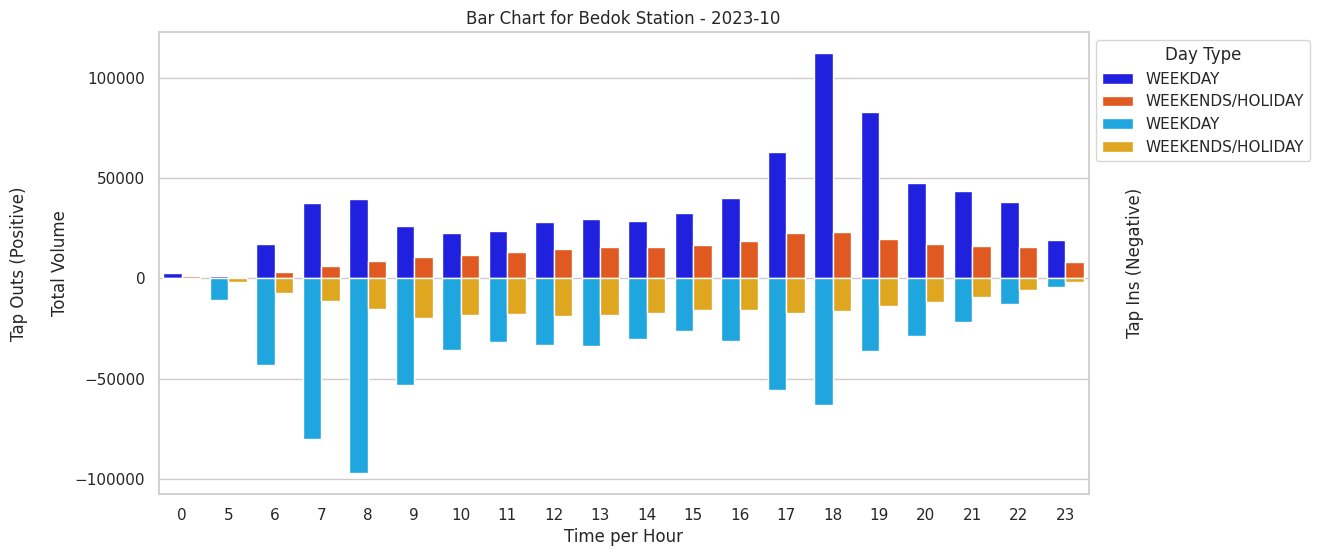

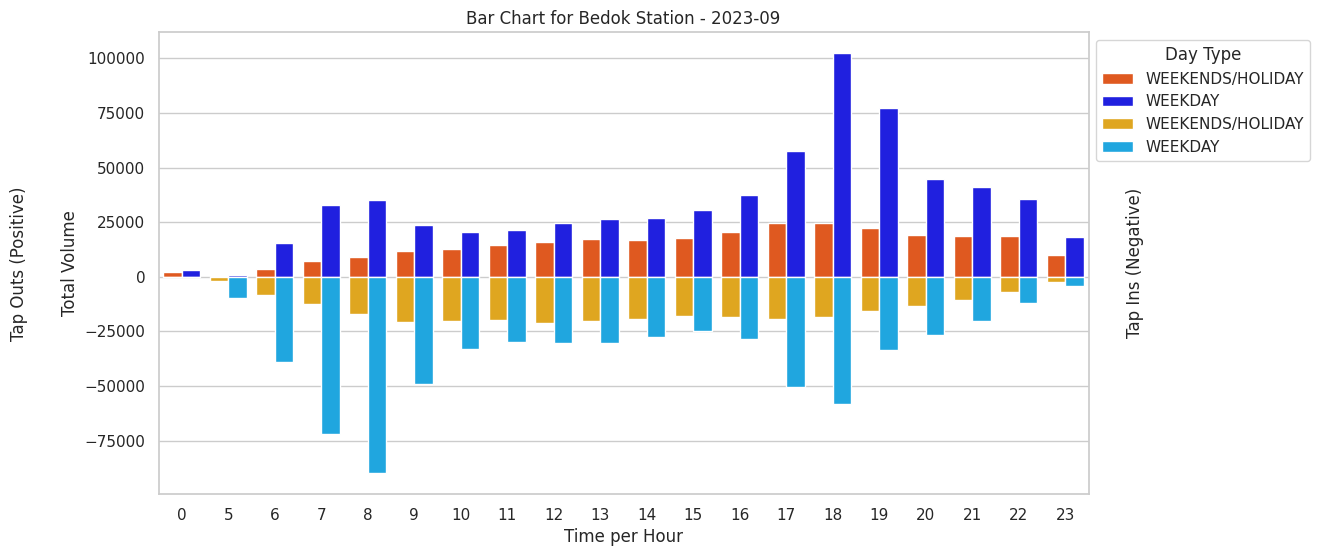

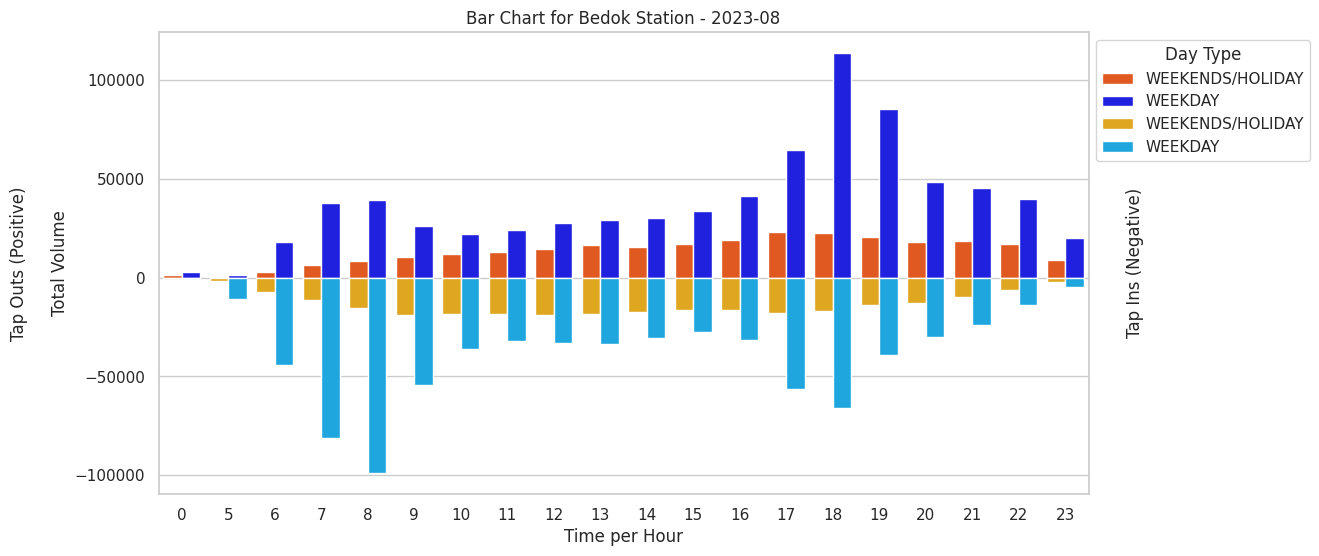

In [9]:

# Specify the months for which you want to create charts
selected_months = ['2023-10', '2023-09', '2023-08']

# Filter the DataFrame for the specified station (e.g., Bedok) and selected months
filtered_df = result_df[(result_df['mrt_station_english'] == 'Bedok') & (result_df['YEAR_MONTH'].isin(selected_months))]

# Sort the DataFrame by 'YEAR_MONTH' and 'TIME_PER_HOUR'
filtered_df = filtered_df.sort_values(by=['TIME_PER_HOUR'])

# Set custom color palettes for the plot
custom_palette_IN = {'WEEKDAY': (0.000, 0.7, 1), 'WEEKENDS/HOLIDAY': (1, 0.7, 0)}
custom_palette_OUT = {'WEEKDAY': (0.000, 0.000, 1.000), 'WEEKENDS/HOLIDAY': (1.000, 0.3, 0.000)}

# Plot three separate charts for each specified month
for month in selected_months:
    month_data = filtered_df[filtered_df['YEAR_MONTH'] == month]

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Create a bar chart for 'TOTAL_TAP_OUT_VOLUME' with positive values
    sns.barplot(data=month_data, x='TIME_PER_HOUR', y='TOTAL_TAP_OUT_VOLUME', hue='DAY_TYPE', palette=custom_palette_OUT)

    # Create a bar chart for 'TOTAL_TAP_IN_VOLUME' with negative values
    sns.barplot(data=month_data, x='TIME_PER_HOUR', y=-month_data['TOTAL_TAP_IN_VOLUME'], hue='DAY_TYPE', palette=custom_palette_IN)

     # Include total volume in the title
    title = f'Bar Chart for Bedok Station - {month}'
    plt.title(title)
    plt.xlabel('Time per Hour')
    plt.ylabel('Total Volume')
    
    # Add custom y-axis label
    plt.text(-0.15, 0.5, 'Tap Outs (Positive)', rotation='vertical', va='center', ha='center', transform=plt.gca().transAxes)
    plt.text(1.05, 0.5, 'Tap Ins (Negative)', rotation='vertical', va='center', ha='center', transform=plt.gca().transAxes)

    plt.legend(title='Day Type', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()